# Traditional ML

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, multilabel_confusion_matrix, classification_report

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

import pickle

import warnings
warnings.filterwarnings('ignore')

In [73]:
dataset_path = 'full_dataset/full_dataset.csv'
data = pd.read_csv(dataset_path)
data

,emotion,original_text,text_tokens,preprocessed_text
0,happiness,"During the period of falling in love, each tim...","['period', 'falling', 'love', 'time', 'met', '...",period falling love time met especially met lo...
1,fear,When I was involved in a traffic accident.,"['involved', 'traffic', 'accident']",involved traffic accident
2,anger,When I was driving home after several days of...,"['driving', 'home', 'several', 'day', 'hard', ...",driving home several day hard work motorist ah...
3,sadness,When I lost the person who meant the most to me.,"['lost', 'person', 'meant']",lost person meant
4,disgust,The time I knocked a deer down - the sight of ...,"['time', 'knocked', 'deer', 'sight', 'animal',...",time knocked deer sight animal injury helpless...
...,...,...,...,...
9882,shame,He gets real humiliated and has to leave .,"['get', 'real', 'humiliated', 'leave']",get real humiliated leave
9883,shame,They aimed for higher status jobs and felt hum...,"['aimed', 'higher', 'status', 'job', 'felt', '...",aimed higher status job felt humiliated unempl...
9884,shame,He cursed his lack of self-control ; he knew t...,"['cursed', 'lack', 'selfcontrol', 'knew', 'old...",cursed lack selfcontrol knew old biddy seen fe...
9885,shame,Sometimes I've thought I 'll never forget wha...,"['sometimes', 'ive', 'thought', 'never', 'forg...",sometimes ive thought never forget happened co...


In [74]:
class_names = data['emotion'].unique()

In [75]:
X = data['original_text']
Y = data['emotion']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=357)

print("Training set size = ", X_train.shape[0])
print("Test set size = ", X_test.shape[0])

Training set size =  7909
Test set size =  1978


## Klasifikatori

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [9]:
def cleanText(text):
    text = text.lower()

    # Remove links
    text = re.sub(r"http\S*|\S*\.com\S*|\S*www\S*", " ", text)

    # Remove @mentions
    text = re.sub(r"\s@\S+", " ", text)

    # Remove all punctuation
    punctuation_table = str.maketrans("", "", string.punctuation)
    text = text.translate(punctuation_table)

    # Replace multiple spaces with a single space
    text = re.sub(r"\s+", " ", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = [token for token in tokens if len(token)>2]

    return tokens

In [77]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=cleanText, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data['original_text'])

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

### Naive Bayes

Accuracy: 56.47%

F1 Score: 56.47

Confusion Matrix:
 [[215   9  12   1  28  46   3   0]
 [ 60  63  32   1  24  42   4   0]
 [ 28   1 233   0  23  28   0   0]
 [ 69   2  17  32  17  60   8   0]
 [ 13   0   9   0 236  36   1   0]
 [ 17   1  13   2  21 279   1   0]
 [ 59   7  30   3  45  50  59   0]
 [  5   0  10   0   6  17   0   0]]


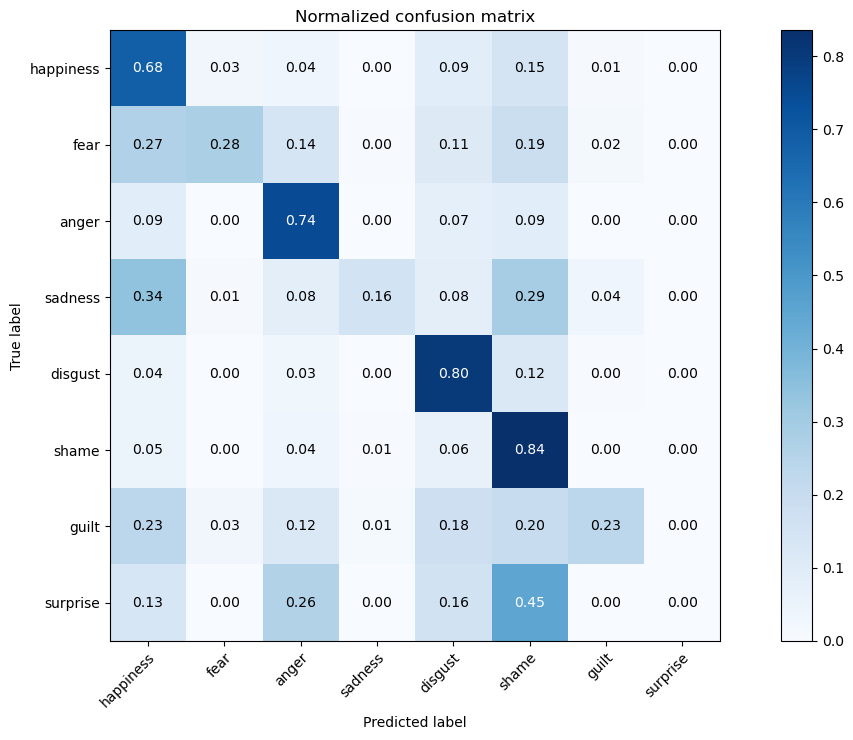

In [50]:
naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(X_train_vect, Y_train)

y_pred_naive_bayes = naive_bayes_model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred_naive_bayes) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, y_pred_naive_bayes, average='micro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_naive_bayes))

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred_naive_bayes, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

### Logistic Regression

Accuracy: 63.40%

F1 Score: 63.40

COnfusion Matrix:
 [[222  17  15  12  21  21   6   0]
 [ 40 130  14   1  19  16   6   0]
 [ 28  12 236   2  23  10   2   0]
 [ 55   9  19  75  16  24   7   0]
 [ 16   2  12   4 246  13   2   0]
 [ 21   8  22   7  28 244   4   0]
 [ 39  18  29  14  39  16  98   0]
 [  9   1   9   0   8   8   0   3]]


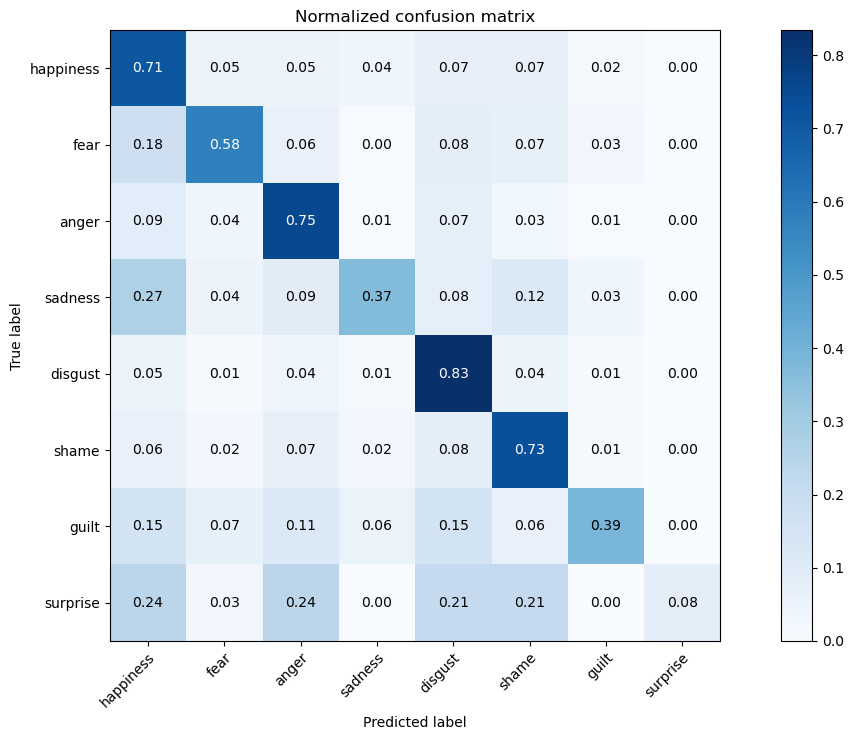

In [51]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
lr_model.fit(X_train_vect, Y_train)

y_pred_lr = lr_model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred_lr) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, y_pred_lr, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))

plot_confusion_matrix(Y_test, y_pred_lr, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

### SVM

Accuracy: 67.54%

F1 Score: 67.54

COnfusion Matrix:
 [[206  19  11  25  22  18  13   0]
 [ 27 147   7   4  14  13  14   0]
 [ 20  15 246   6  10  11   5   0]
 [ 32  11  16  88  18  21  19   0]
 [ 10   4  15   7 245   9   5   0]
 [ 11  12  14  10  22 255  10   0]
 [ 32  24  20  20  32  10 115   0]
 [  0   1   3   0   0   0   0  34]]


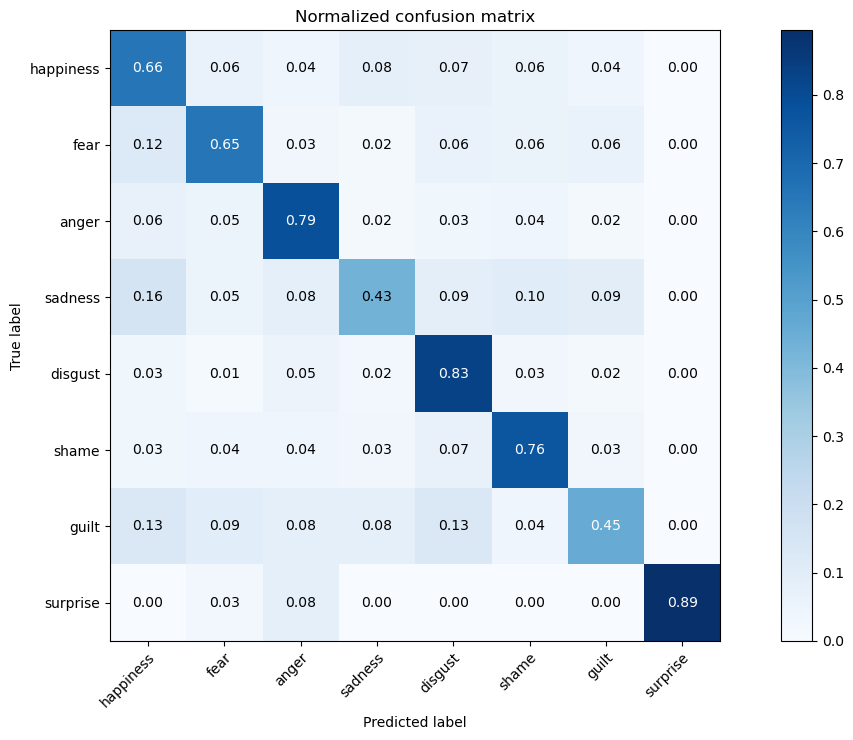

In [78]:
svc_model = LinearSVC(tol=1e-05)
svc_model.fit(X_train_vect, Y_train)

y_pred_svm = svc_model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred_svm) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, y_pred_svm, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))

plot_confusion_matrix(Y_test, y_pred_svm, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Od ovih modela najbolji je SVM + tfidf. Njega ćemo spremiti.

## Spremanje modela

In [79]:
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc_model),
])

In [10]:
filename = 'models/tfidf_svm.h5'

In [80]:
pickle.dump(svm_model, open(filename, 'wb'))

In [14]:
model = pickle.load(open(filename, 'rb'))

message = 'I love Christmas'
print("Predicted emotion:", list(model.predict([message]))[0])

Predicted emotion: happiness
